In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("TwoParameterBlueSkyCatastrophe_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[1689, 2403, 14573, 7649, 10929, 14305, 2584, ..."
1,BFS,AED,"[1013, 1451, 20399, 7871, 20696, 3197, 14490, ..."
2,BFS,AEQD,"[14880, 1066, 2209, 14136, 1867, 1463, 7936, 8..."
3,BFS,SMD,"[1582, 2078, 1559, 2065, 1825, 1597, 1371, 154..."
4,ID-DLS,none,"[8873, 16300, 929, 1423, 7134, 42, 19990, 1222..."
5,ID-DLS,AED,"[1238, 2645, 7706, 6629, 3204, 14810, 13862, 7..."
6,ID-DLS,AEQD,"[101, 7227, 543, 83, 6941, 824, 1592, 869, 76,..."
7,ID-DLS,SMD,"[279, 916, 1193, 1068, 825, 1089, 279, 317, 40..."
8,MMDR,none,"[7608, 7398, 7380, 7380, 7361, 7608, 7608, 762..."
9,MMDR,AED,"[7398, 7645, 7627, 7361, 7645, 7645, 7361, 736..."


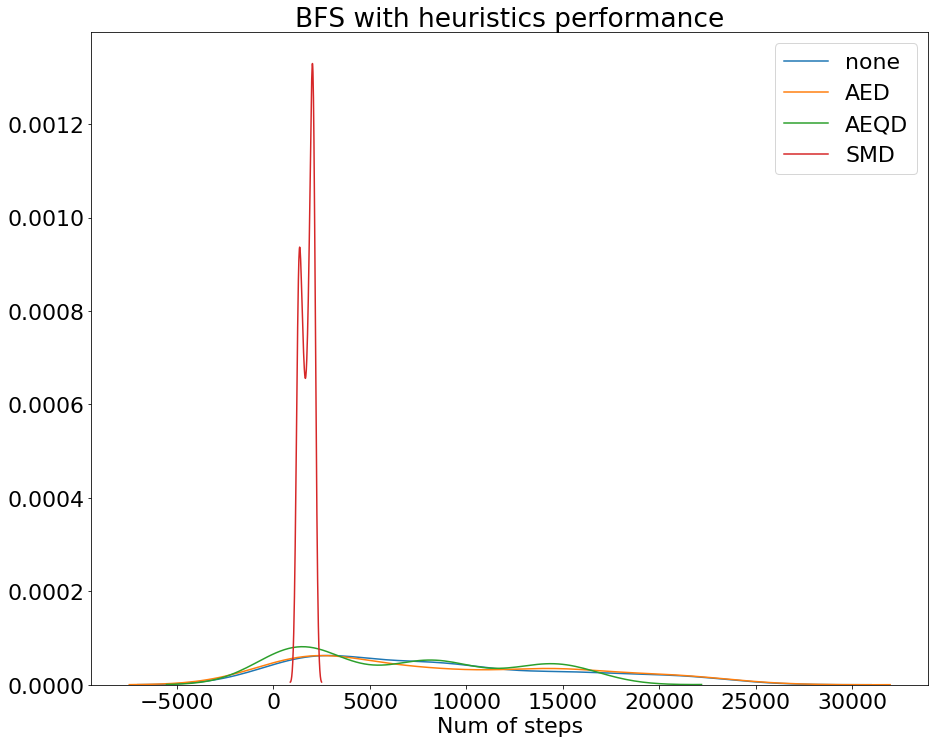

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");


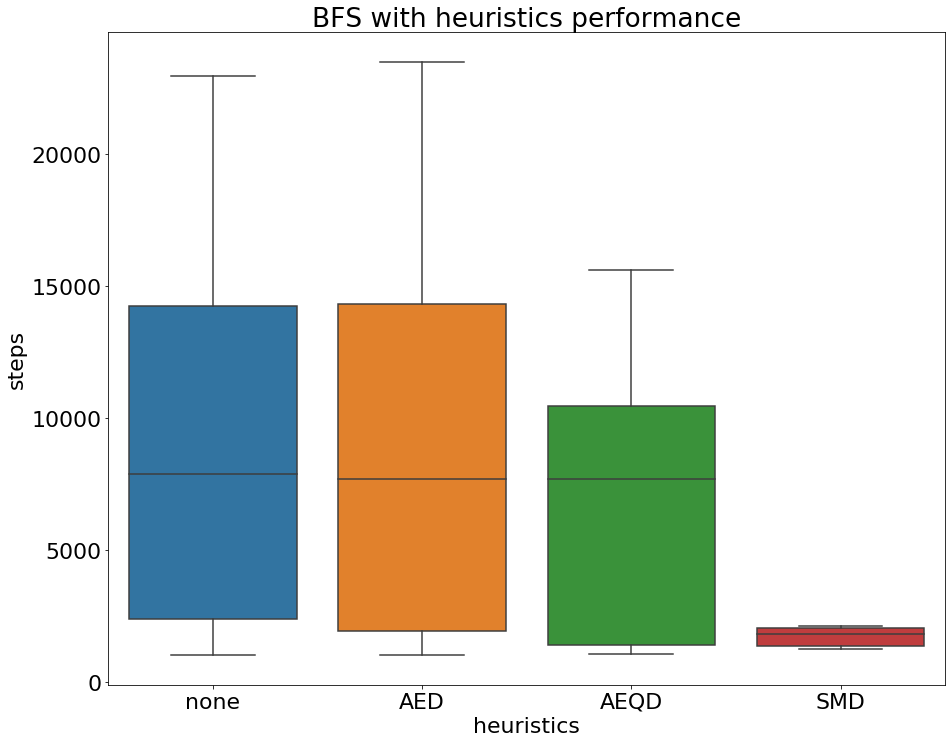

In [4]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

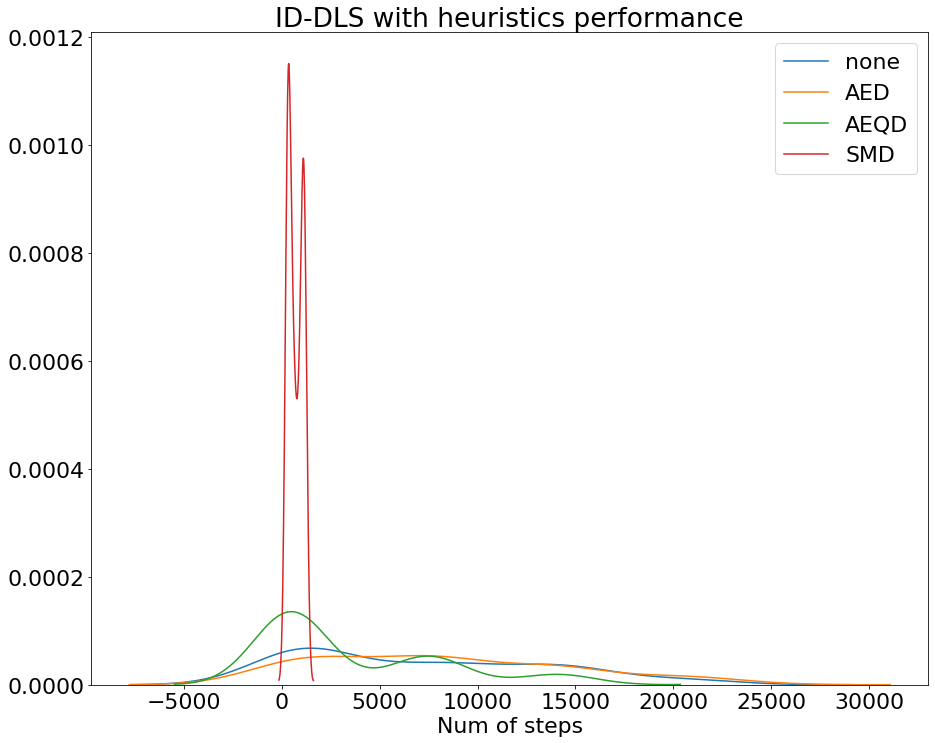

In [5]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");


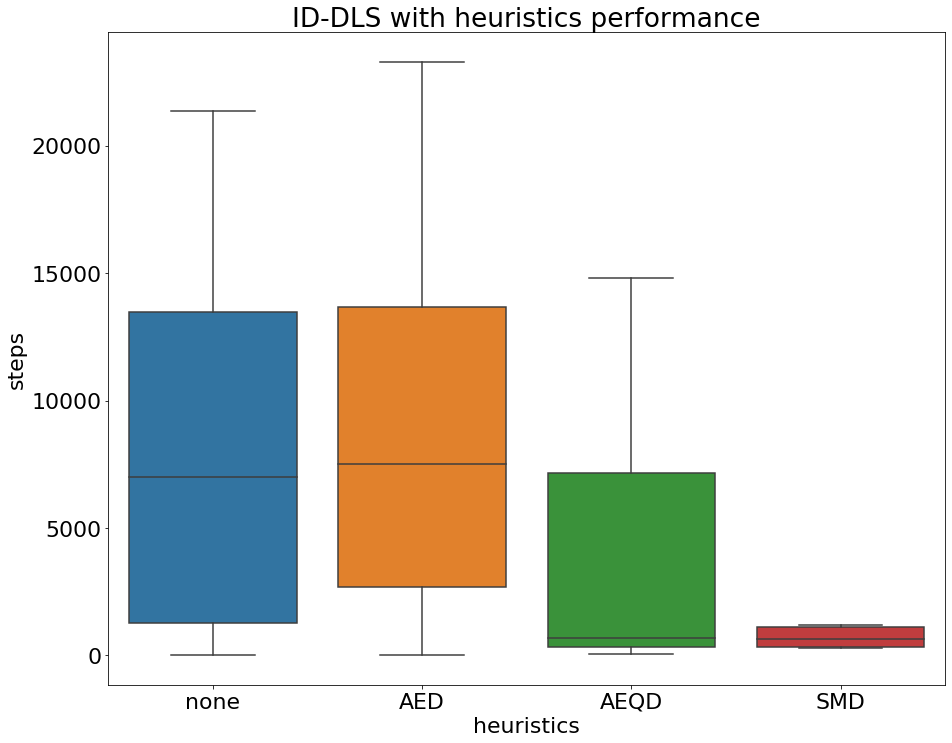

In [6]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


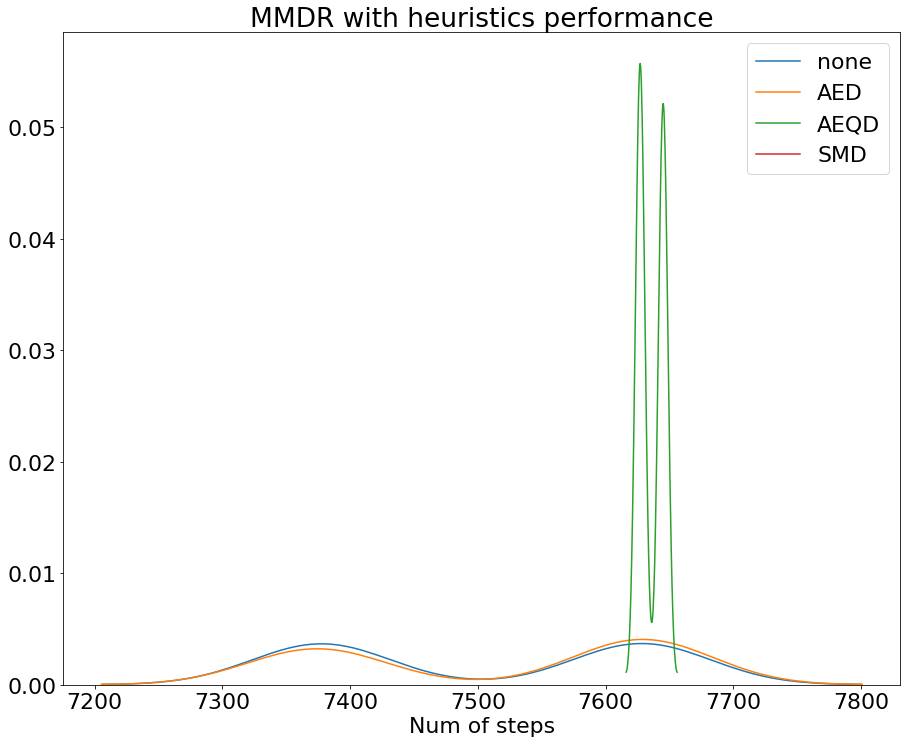

In [7]:
df_mmdr = df[df.algorithm == "MMDR"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_mmdr[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)

plt.legend()
plt.xlabel("Num of steps")
plt.title("MMDR with heuristics performance");


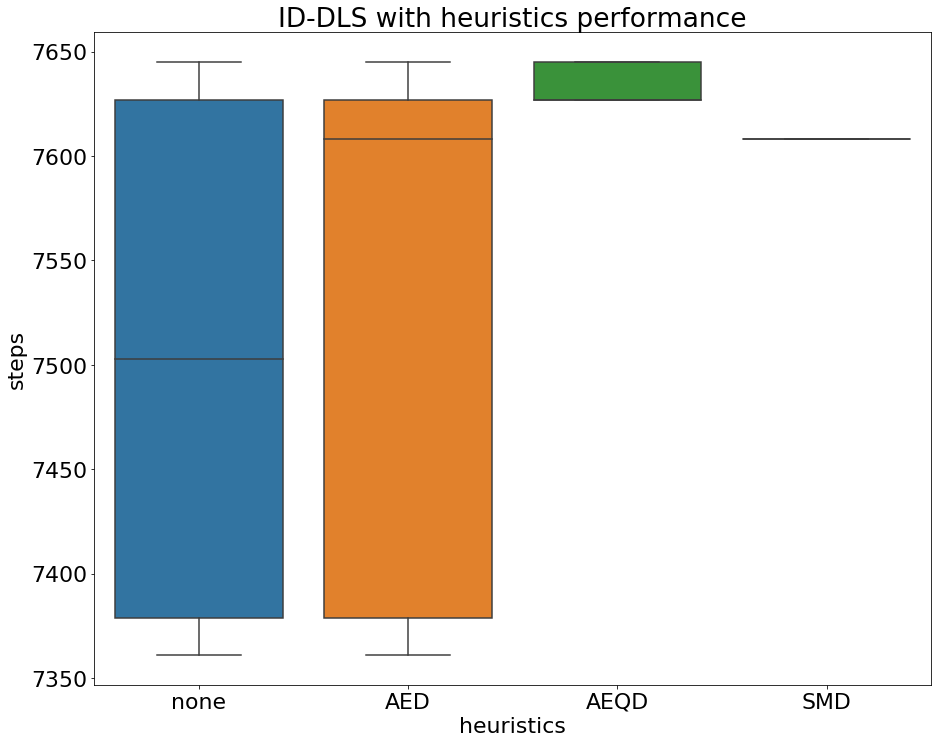

In [8]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_mmdr.explode("steps"))
plt.title("ID-DLS with heuristics performance");

c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


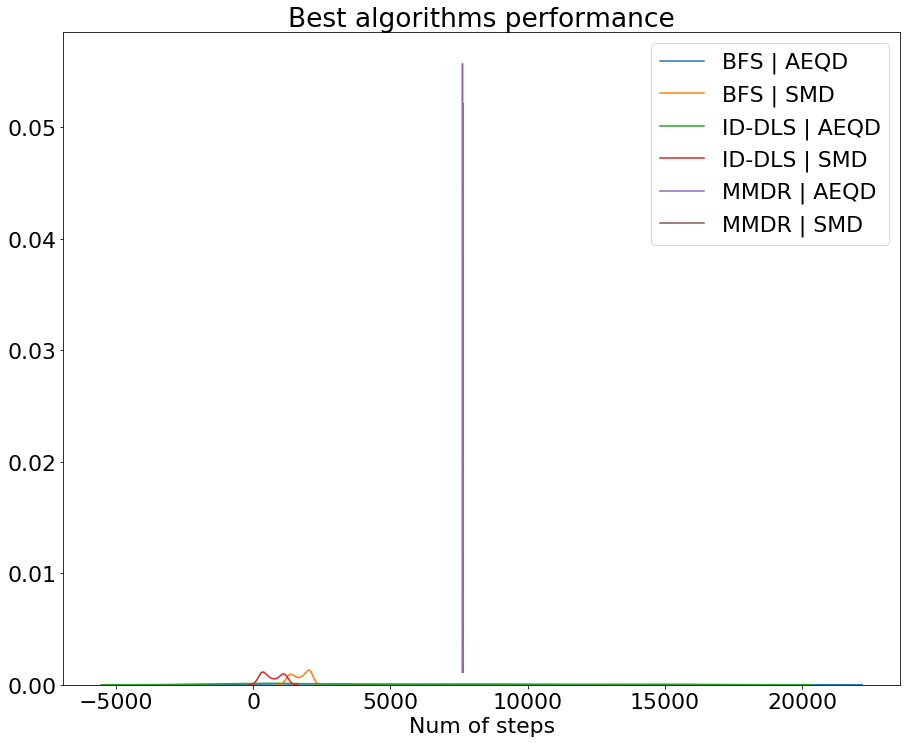

In [9]:
df_best = df[(df.heuristics.isin(["AEQD", "SMD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");


c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


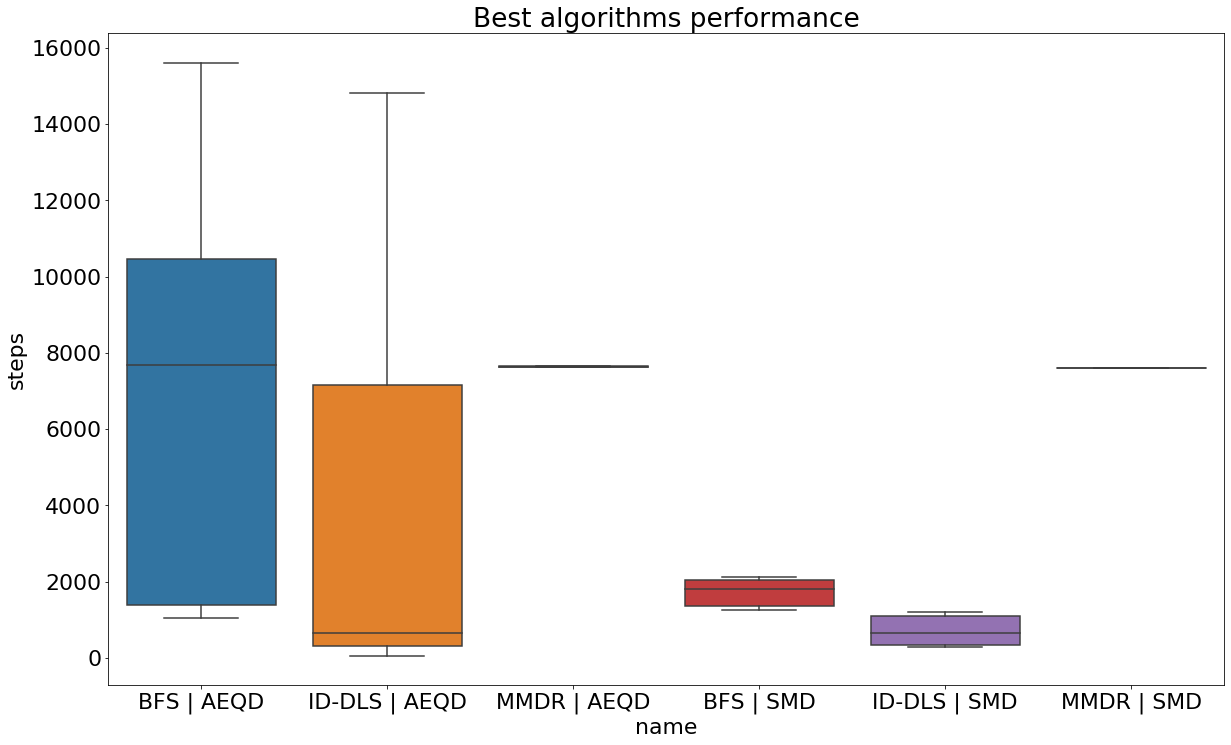

In [10]:
plt.figure(figsize=(20, 12))
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


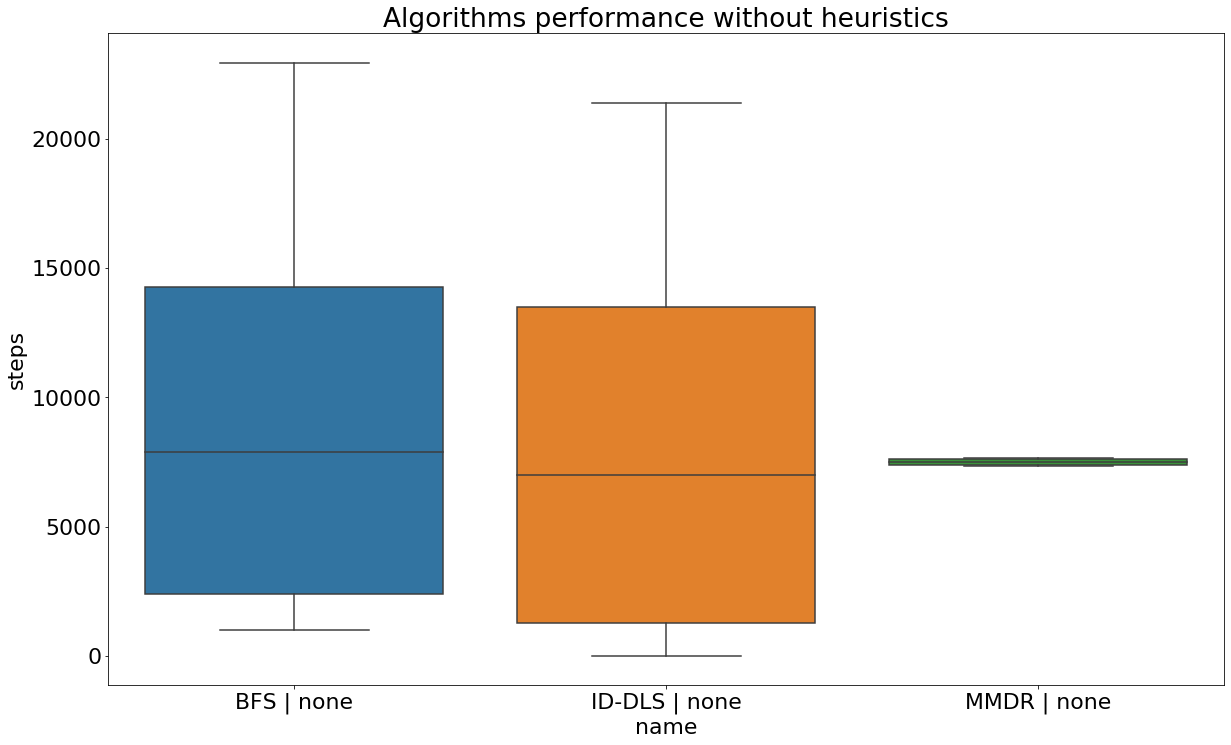

In [11]:
df_no_heur = df[(df.heuristics.isin(["none"]))]

plt.figure(figsize=(20, 12))
df_no_heur["name"] = df_no_heur.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_no_heur.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Algorithms performance without heuristics");


In [13]:
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]
mmdr_none = df[(df.algorithm == "MMDR") & (df.heuristics == "none")].steps.values[0]
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "SMD")].steps.values[0]

print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")
print(f"MMDR: {np.mean(mmdr_none)} +- {np.std(mmdr_none)}")
print(f"SMD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")

BFS: 8495.541666666666 +- 6566.428028103551
MMDR: 7502.875 +- 126.09986535150094
SMD ID-DLS: 699.7666666666667 +- 349.3673027377093


In [14]:
print("Total speedup:", np.mean(bfs_none) / np.mean(smd_iddls))


Total speedup: 12.140534940218167
